<a href="https://colab.research.google.com/github/GeraldineQuispeT/Machine-Learning/blob/main/ENTREGA_Hard_SVM_2024_21ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Practice  Hard SVM.
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Hard SVM \\
  Termina      : 12:45
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


  



In [1]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxopt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Lagrange Multipliers

$\frac{\partial f(x)}{ \partial x} = λ \frac{\partial g(  x)}{ \partial x}$

----
Find the values of  $λ_i$ for each training elements $X_i$.

The  ***GetLambda*** function returns a vector that we will call  lambda, such that   $lambda[i]$ will be  $0$, if the element  $X[i]$ does not intersect with any of the lines   $XW^t + b >=1$ o $XW^t + b >=0$

Note: X is a matrix, so $X_i$ will be a  $K$-dimensional vector that represent the  i-th  object or  $k$-dimensional point, and  $X_{ij}$ is  the  j-th  element of the  i-th objet.

----


- **Note: The code for finding the lambda values is provided to you.**

In [2]:
import numpy as np
from cvxopt import matrix, solvers

def GetLambda(X, y):
    n, m = X.shape # n = número de muestras, m = número de características (dimensión)
    y = y.astype(float)

    # Kernel lineal multiplicado por las etiquetas (y_i * y_j * x_i^T x_j)
    K = np.dot(X, X.T) * np.dot(y, y.T)
    P = matrix(K)
    q = matrix(-np.ones(n))
    G = matrix(-np.eye(n)) # α_i ≥ 0 (restricción de no negatividad)
    h = matrix(np.zeros(n))
    A = matrix(y.reshape(1, -1)) # Restricción: sum(α_i * y_i) = 0
    b = matrix(np.zeros(1))

    # Resolver el problema cuadrático
    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(sol['x'])
    return alpha

#Ejemplo para utilizar esta función
#lamda = GetLambda(X,Y)
#sv = lamda > 1e-5
#print(sv)

## 2 Calculation of the Weights W
$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  

----
Where: $λ_i$ represent  $i-th$ lagrange multiplier, $W_j$ is the $j-th$ weight,   $x_{ij}$ denotes the value of feacture $(j)$ for the $(i)-th$ training objetc, and $y_i$ is the expected output (1 or -1) for the $i-th$ object.

$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  
Note that the summation only includes elements for which the Lagrange

----

multiplier $lamnda_i$ is nonzero.



In [3]:
#Calcula el vector de pesos W para una SVM lineal
# X: matriz de características (n muestras x m características)
# Y: vector de etiquetas (n,)
# lambda_list: vector de multiplicadores de Lagrange (n,)
# tol: umbral para considerar lambda > 0 (vectores de soporte)
# W: vector de pesos (m,)

def Get_W(X,Y,lambda_list, tol=1e-5):
    n, m = X.shape# n = número de muestras, m = dimensión
    W = np.zeros(m)

    for i in range(n):
        if lambda_list[i] > tol:
            W += lambda_list[i] * Y[i] * X[i]

    return W


## Finding the Bias (b)

$XW^t + b = 0$

$b = - \frac{1}{n}∑_{i=0}^n X_iW^t$

Where $X_i$ is a $k$-dimensional vector representing the $i$-th object, and $k$ is the number of features of the object.



In [4]:
# Calcula el bias b para una SVM lineal.
# X: matriz de características (n muestras x m características)
# W: vector de pesos (m,)
# b: bias escalar

def Get_b(X,W):
    n = X.shape[0]
    XW = np.dot(X, W)# Producto escalar XW para cada muestra
    b = -np.sum(XW) / n
    return b


## Testing Stage

----
For this stage, one should only calculate :

- $f(X_j) = X_jW^t + b$

But since we have already calculated the values of the parameters $W$ and  $b$, then by substituting we have :

- $f(X_j) = \sum_{i=0}^n \lambda_iy_i<X_{i},X_{j}> + b$

Donde: $X_i$ is the i-th  training vector and  $X_j$   is the new vector that passes through the model for predicting the class (1 or -1)

Finally, to determine which class the new vector $X_j$   belongs to, it is sufficient to check the sign of f(X_j).

  - **If $f(X_j) >=0$ then $Y_j$ = 1 else $Y_j = -1$**
  -----

In [5]:
# Predice la clase de un nuevo vector X usando el hiperplano de la SVM.
# X: El nuevo vector de entrada (n-dimensional).
# W: El vector de pesos (n-dimensional).
# b: El sesgo calculado durante el entrenamiento.
# La clase predicha (1 o -1) para el nuevo vector X.

def Test(X, W, b):
    f_X = np.dot(X, W) + b # Calculamos la función de decisión f(X)
    if f_X >= 0: # Si f(X) >= 0, predice 1, de lo contrario predice -1
        return 1
    else:
        return -1

Database for Testing:
[Download](https://docs.google.com/spreadsheets/d/15-E3kiLJ6bCyXuJvSmxYAp2QYMkPX2QlQ597fAsPYy8/edit#gid=0).

----
Download the database to your disk and use files.upload() to load it onto the drive. The code is provided.
----


- Split the dataset into 70% for training and 30% for testing.
- Add a value of 1 for the first class and -1 for the second class.
- In the testing stage, find the number of elements correctly classified and the number of elements incorrectly classified for each class

- Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which will show us the efficiency of the method.

- Do not forget to normalize the data.

- Plot the lines that separate both classes.

----


In [6]:
# PASO 1: Split the dataset into 70% for training and 30% for testing.
import pandas as pd
import numpy as np
from google.colab import files

filename = files.upload()
name = list(filename.keys())[0]
data = pd.read_csv(name)

X = data[["sepal.length","sepal.width","petal.length","petal.width"]]
Y = data[["variety"]]
print(X)

# Splitting the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , random_state=104,  test_size=0.30,    shuffle=True)

Saving DataSet_Iris_2_Clases.csv - Hoja 1.csv to DataSet_Iris_2_Clases.csv - Hoja 1 (1).csv
    sepal.length  sepal.width  petal.length  petal.width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
..           ...          ...           ...          ...
95           5.7          3.0           4.2          1.2
96           5.7          2.9           4.2          1.3
97           6.2          2.9           4.3          1.3
98           5.1          2.5           3.0          1.1
99           5.7          2.8           4.1          1.3

[100 rows x 4 columns]


In [9]:
# PASO 2: Add a value of 1 for the first class and -1 for the second class. (Ya estan clasificados como +1 y -1)
print("Y_train valores:", Y_train.value_counts())
print("Y_test valores:", Y_test.value_counts())

Y_train valores: variety
-1         35
 1         35
Name: count, dtype: int64
Y_test valores: variety
-1         15
 1         15
Name: count, dtype: int64


In [10]:
# PASO 3: Normalizar la data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
# PASO 4: Entrenar y testear con la data normalizada

lambda_list = GetLambda(X_train_scaled.values, Y_train.values)
W =  Get_W(X_train_scaled.values, Y_train.values, lambda_list)
b =  Get_b(X_train_scaled.values, W)

print("Calculated W:", W)
print("Calculated b:", b)

# Calcular los valores predichos para X_test
Y_pred  = np.sign([Test(x, W, b) for x in X_test_scaled.values])

     pcost       dcost       gap    pres   dres
 0: -2.1816e+00 -3.6160e+00  1e+02  1e+01  1e+00
 1: -5.2604e-01 -1.3391e+00  1e+01  8e-01  1e-01
 2: -1.1901e-01 -8.9195e-01  8e-01  2e-16  6e-16
 3: -3.4787e-01 -5.7000e-01  2e-01  1e-16  5e-16
 4: -4.8540e-01 -5.3575e-01  5e-02  1e-16  4e-16
 5: -5.1148e-01 -5.3353e-01  2e-02  2e-16  5e-16
 6: -5.2747e-01 -5.2909e-01  2e-03  2e-16  5e-16
 7: -5.2876e-01 -5.2881e-01  5e-05  1e-16  4e-16
 8: -5.2880e-01 -5.2880e-01  5e-07  3e-16  5e-16
Optimal solution found.
Calculated W: [-0.32641023  0.27152093 -0.7145777  -0.60556615]
Calculated b: -1.3005469717037549e-16


In [15]:
# PASO 5: find the number of elements correctly classified and the number of elements incorrectly classified for each class
class_correct = {}
class_incorrect = {}
Y_test_reset = Y_test.reset_index(drop=True)

for etiqueta_original in [1, -1]:
    indices = Y_test_reset[Y_test_reset['variety'] == etiqueta_original].index
    predicted_labels = Y_pred[indices]
    true_labels = Y_test_reset.loc[indices, 'variety'].values

    correct = np.sum(predicted_labels == true_labels)
    incorrect = np.sum(predicted_labels != true_labels)

    class_correct[etiqueta_original] = correct
    class_incorrect[etiqueta_original] = incorrect

print("Clasificacion correcta por clase:", class_correct)
print("Clasificacion incorrecta por clase:", class_incorrect)

Clasificacion correcta por clase: {1: np.int64(15), -1: np.int64(15)}
Clasificacion incorrecta por clase: {1: np.int64(0), -1: np.int64(0)}


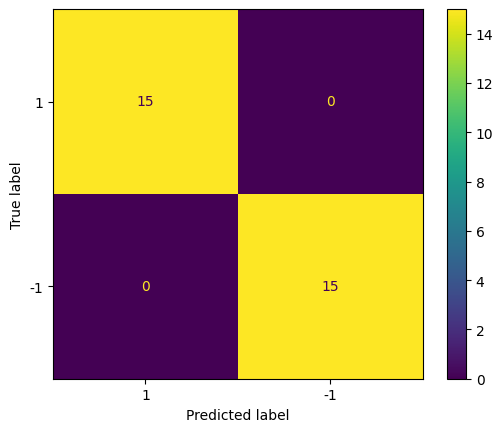

In [18]:
## PASO 6: Matriz de confusion

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, -1])
cm_display.plot()
plt.show()

----

- Subir el link de su colab a canvas
- Disfruten aprendiendo. La única forma de aprender es haciendo.
- Buena Suerte.
----